In [1]:
## Import Required library
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.preprocessing import scale
import seaborn as sns 
from sklearn.metrics import silhouette_score


In [2]:
usarrest = pd.read_csv(r"C:\Users\Administrator\Desktop\GIM term 2\PPA\USArrest (1).csv",index_col=0)

In [3]:
usarrest.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [4]:
usarrest.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [5]:
usarrest.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 2.0+ KB


## scaling of dataset for kmean clustering

In [6]:
type(usarrest)

pandas.core.frame.DataFrame

https://www.youtube.com/watch?v=pT17z_PziZs

https://towardsdatascience.com/machine-learning-algorithms-part-9-k-means-example-in-python-f2ad05ed5203

In [7]:
usarrest_F = scale(usarrest)

In [8]:
usarrest_F

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

## create cluster k mean alogrithm

In [9]:
kmeans=KMeans(n_clusters=3)

##### kmeans

In [10]:
kmeans.fit_predict(usarrest_F)

array([1, 1, 1, 2, 1, 1, 0, 0, 1, 1, 0, 2, 1, 0, 2, 0, 2, 1, 2, 1, 0, 1,
       2, 1, 1, 2, 2, 1, 2, 0, 1, 1, 1, 2, 0, 0, 0, 0, 0, 1, 2, 1, 1, 0,
       2, 0, 0, 2, 2, 0])

In [11]:
kmeans.fit(usarrest_F)

KMeans(n_clusters=3)

In [12]:
kmeans.cluster_centers_

array([[-1.11467476, -1.17725513, -1.00201665, -1.05938813],
       [ 1.01513667,  1.02412028,  0.19959126,  0.85556386],
       [-0.4232269 , -0.39645259,  0.37001884, -0.28726357]])

In [13]:
labels = kmeans.labels_

In [14]:
labels

array([1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 2, 0, 1, 2, 0, 2, 2, 1, 0, 1, 2, 1,
       0, 1, 1, 0, 2, 1, 0, 2, 1, 1, 1, 0, 2, 2, 2, 2, 2, 1, 0, 1, 1, 2,
       0, 2, 2, 0, 0, 2])

In [15]:
## add label  to dataset
usarrest['labels'] =  kmeans.labels_

In [16]:
usarrest.head()

,Murder,Assault,UrbanPop,Rape,labels
Alabama,13.2,236,58,21.2,1
Alaska,10.0,263,48,44.5,1
Arizona,8.1,294,80,31.0,1
Arkansas,8.8,190,50,19.5,2
California,9.0,276,91,40.6,1


In [17]:
score = silhouette_score(usarrest, kmeans.labels_, metric='euclidean')

In [18]:
print(score)

0.3606439361490136


# visualize cluster with dataset

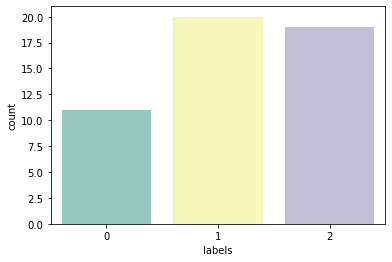

In [19]:
sns.countplot(x="labels", data=usarrest, palette="Set3")

In [20]:
from sklearn.cluster import KMeans

Using the elbow method to find out the optimal number of #clusters. 
#KMeans class from the sklearn library.

In [21]:

sse =  []
for k in range(1,20):
    km = KMeans(n_clusters=k)
    km = km.fit(usarrest_F)
    sse.append(km.inertia_)

#plt.plot(k,sse)

https://www.youtube.com/watch?v=nMXg0f5HBac

In [22]:
print(sse)

[200.0, 104.96163315756873, 80.08569526137276, 57.55425863091106, 50.07656289493946, 44.00857378563497, 39.62885912877274, 35.53468931626093, 31.09701102634426, 28.168605300149682, 25.041462491782, 23.125534738156148, 21.32740688852507, 19.86481003836256, 17.43526248285029, 16.67884732079934, 15.71581903669267, 15.244558391119206, 13.93073944066383]


In [23]:
print(k)

19


https://medium.com/pursuitnotes/k-means-clustering-model-in-6-steps-with-python-35b532cfa8ad

In [24]:
print(range(1,20))

range(1, 20)


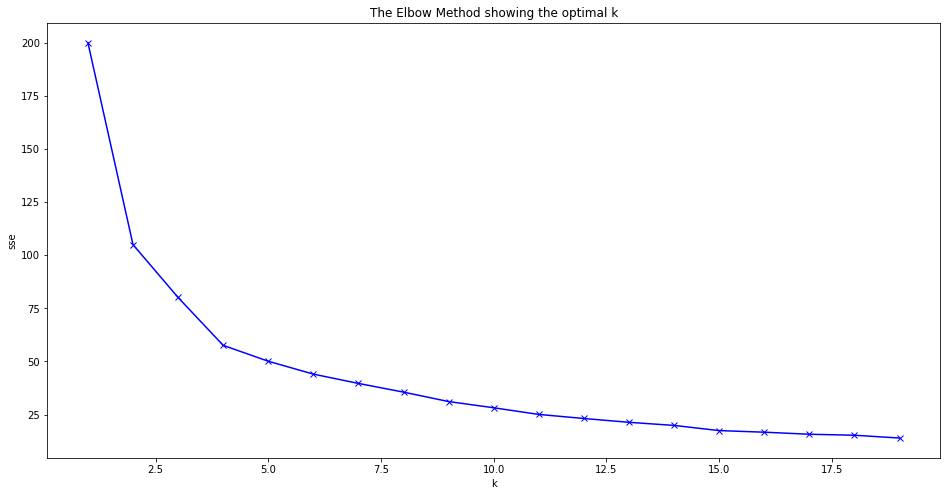

In [25]:
plt.figure(figsize=(16,8))
plt.plot(range(1,20), sse, 'bx-')
plt.xlabel('k')
plt.ylabel('sse')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [26]:
kmeans = KMeans(n_clusters= 4)

In [27]:
y_kmeans = kmeans.fit_predict(usarrest)

In [28]:
usarrest = np.array(usarrest)

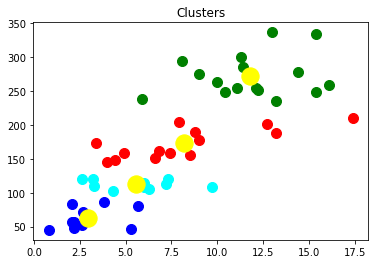

In [29]:
plt.scatter(usarrest[y_kmeans==0, 0], usarrest[y_kmeans==0, 1], s=100, c='red', label ='Cluster 1')
plt.scatter(usarrest[y_kmeans==1, 0], usarrest[y_kmeans==1, 1], s=100, c='blue', label ='Cluster 2')
plt.scatter(usarrest[y_kmeans==2, 0], usarrest[y_kmeans==2, 1], s=100, c='green', label ='Cluster 3')
plt.scatter(usarrest[y_kmeans==3, 0], usarrest[y_kmeans==3, 1], s=100, c='cyan', label ='Cluster 4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label = 'Centroids')
plt.title('Clusters')
plt.show()